<a href="https://colab.research.google.com/github/Feev004/Colab_Artifical_Intelligence/blob/main/Dormitory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

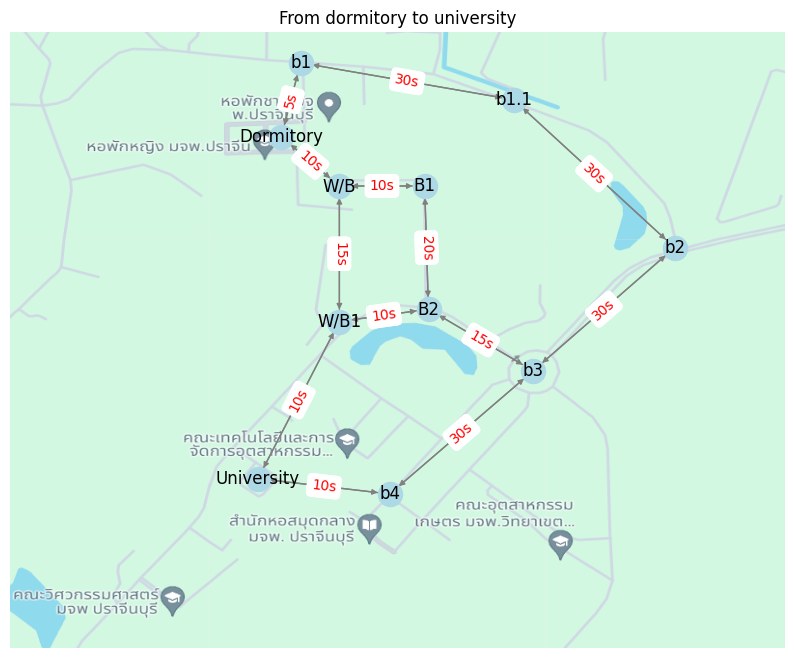

In [107]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 1: Create a graph with position and distances
position = ['Dormitory', 'University', 'W/B1', 'B1', 'W/B', 'B2',
            'b1', 'b1.1', 'b2', 'b3', 'b4']
distances = {
    ('Dormitory', 'W/B'): 10, ('W/B', 'Dormitory'): 10,
    ('Dormitory', 'b1'): 5, ('b1', 'Dormitory'): 5,
    ('b1', 'b1.1'): 30, ('b1.1', 'b1'): 30,
    ('b1.1', 'b2'): 30, ('b2', 'b1.1'): 30,
    ('b2', 'b3'): 30, ('b3', 'b2'): 30,
    ('b3', 'b4'): 30, ('b4', 'b3'): 30,
    ('W/B', 'W/B1'): 15, ('W/B1', 'W/B'): 15,
    ('W/B', 'B1'): 10, ('B1', 'W/B'): 10,
    ('B1', 'B2'): 20, ('B2', 'B1'): 20,
    ('b3', 'B2') : 15, ('B2', 'b3') : 15,
    ('B2', 'W/B1'): 10, ('W/B1', 'B2'): 10,
    ('b4', 'University'): 10, ('University', 'b4'): 10,
    ('W/B1', 'University'): 10, ('University', 'W/B1'): 10
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes (position)
G.add_nodes_from(position)

# Add weighted edges (distances)
for (point1, point2), distance in distances.items():
    G.add_edge(point1, point2, weight=distance)
    # Note: Only add edge in one direction to keep it directed

# Load the background image
img = mpimg.imread('Dormitory.png')  # Replace 'Dormitory.jpg' with your image path

# Define positions of the nodes manually to fit the image
pos = {
    'University': (-0.36, -0.45),  #(v,h)
    'Dormitory': (-0.3, 0.66),
    'W/B': (-0.15, 0.5),
    'W/B1': (-0.15, 0.06),
    'B1': (0.07, 0.5),
    'B2': (0.08, 0.1),
    'b1' : (-0.25, 0.9),
    'b1.1' : (0.3,0.78),
    'b2' : (0.715, 0.3),
    'b3' : (0.35, -0.1),
    'b4' : (-0.02,-0.5)
}

# Create the plot
plt.figure(figsize=(10, 8))

# Display the image
plt.imshow(img, extent=[-1, 1, -1, 1], aspect='auto')

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, edge_color='grey', arrowsize=8, connectionstyle='arc3, rad=0')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]}s' for u, v, d in G.edges(data=True)}, font_color='red')
plt.title("From dormitory to university")
plt.show()
